In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
def split_data(x, y):
    # x = x.reshape(14780,28,28)
    x = (x- np.min(x))/ (np.max(x)-np.min(x))
    for i in range(len(y)):
        if y[i] == 0:
            y[i] = 1
        else:
            y[i] = -1
    index = np.random.permutation(x.shape[0])
    train_index = index[:int(len(index) * 0.8)]
    test_index = index[int(len(index) * 0.8):]
    x_train = x[train_index]
    x_test = x[test_index]
    y_train = y[train_index]
    y_test = y[test_index]

    return x_train, y_train, x_test, y_test

Randomizing the input sequence is to ensure supervised learning, and to make the algorithm learn according to the gradient descent law. If the training data is in order, it will make it difficult for the training results to converge to the bias value.

In [3]:
def compute_loss(data, labels, B, B_0):
    #data = data.reshape(data.shape[0],784)
    logloss = 0
    for i in range(data.shape[0]):
        logloss += np.log(1+np.exp((-labels[i]*(B_0 + np.dot(B,data[i].T)))))
    logloss = logloss/data.shape[0]
    return logloss

In [4]:
def compute_gradients(data, labels, B, B_0):
    #data = data.reshape(data.shape[0],784)
    dB_0 = 0
    dB = 0
    for i in range(data.shape[0]):
        dB_0 += (np.exp( (-labels[i] * (B_0 + np.dot(B, data[i].T)))) )/ (
        1 + np.exp(-(labels[i] * (B_0 + np.dot(B, data[i].T))) * labels[i]))
    for j in range(data.shape[0]):
        dB += (np.exp (-labels[j] * (B_0 + np.dot(B, data[j].T))))/ (
                    1 + np.exp( -(labels[j] * (B_0 + np.dot(B, data[j].T)))) )* labels[j] * data[j]
    dB_0 = -dB_0/(data.shape[0])
    dB = -dB/(data.shape[0])
    return dB, dB_0

In [5]:
def calculate_acc(data, labels, B, B_0, threshold):
    count = 0
    for i in range(data.shape[0]):
        pre = 1/(1+np.exp(-(B_0+np.dot(B,data[i].T))))
        if pre >= threshold:
            pre = 1
        else:pre = -1
        if pre == labels[i]:
            count+=1
        else:continue
    acc = count/data.shape[0]
    return acc

E:\ananconda\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in exp
  """
E:\ananconda\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: overflow encountered in exp
  
E:\ananconda\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.


[array([inf]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan])]
[0.4631258457374831, 0.536874154262517, 0.536874154262517, 0.536874154262517, 0.536874154262517, 0.536874154262517, 0.536874154262517, 0.536874154262517, 0.536874154262517, 0.536874154262517, 0.536874154262517, 0.536874154262517, 0.536874154262517, 0.536874154262517, 0.536874154262517, 0.5368741542

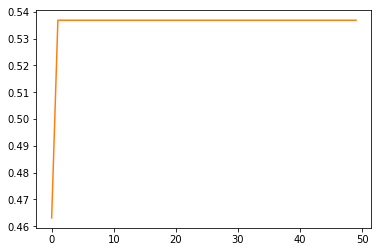

In [6]:
if __name__ == '__main__':
    np.seterr(divide='ignore', invalid='ignore')
    x = np.load('data.npy')
    y = np.load('label.npy')
    ## Split the data to train and test
    x_train, y_train, x_test, y_test = split_data(x,y)
    B = np.random.randn(1, x.shape[1])
    B_0 = np.random.randn(1)
    lr = 0.05
    loss_test = []
    accuracy_test = []
    threshold = 0.5
    for i in range(50):
        ## Compute Loss
        loss = compute_loss(x_train, y_train, B, B_0)
        ## Compute Gradients
        dB, dB_0 = compute_gradients(x_train, y_train, B, B_0)
        ## Update Parameters
        B = B - lr*dB
        B_0 = B_0 - lr*dB_0
        #Compute Accuracy and Loss on Test set (x_test, y_test)
        loss_test.append(compute_loss(x_test, y_test, B, B_0))
        accuracy_test.append(calculate_acc(x_test,y_test,B,B_0,threshold))
    print(loss_test)
    print(accuracy_test)
    plt.plot(loss_test)
    plt.plot(accuracy_test)

It notices that the RuntimeWarning: overflow encountered in exp,I know there is something wrong in the x of exp(x) but I do not know how to solve it.